# Implemening Sigmoid Neuron :
# $S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

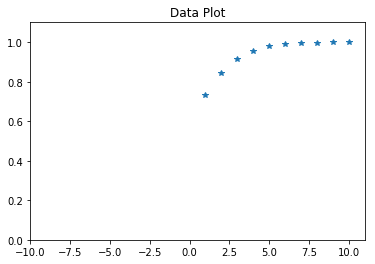

In [0]:
#Data
X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([0.7310,0.8455,0.9168,0.9568,0.9781,0.9890,0.9945,0.9972,0.9986,0.9993])
plt.xlim(-10,11) #As we have x values till 10
plt.ylim(0,1.1)
plt.plot(X,Y,'*')
plt.title("Data Plot");

In [0]:
class SigmoidFunction:
  def __init__(self):
    self.w = None
    self.b = None
    np.random.seed(0)
    
  def Sigmoid(self,x):
    return 1.0/(1.0+np.exp(-(np.dot(self.w,x)+self.b)))
  
  def grad_w(self,x,y):
    y_pred = self.Sigmoid(x)
    return 2*(y_pred - y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred = self.Sigmoid(x)
    return 2*(y_pred - y)* y_pred * (1-y_pred)
  
  def fit(self,X,Y,epochs = 1,lr = 1, initialize = True):
    #initialize the w and b
    if initialize:
      self.w = np.random.randn(1,X.shape[1]) 
      self.b = 0
      
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      
      self.w -= lr*dw
      self.b -= lr*db
      
  def Loss(self,X,Y):
    loss = 0
    for x,y in zip(X,Y):
      loss += (self.Sigmoid(x) - y)**2 #Squared Error loss
    print("Loss is :",loss)

In [0]:
  sf = SigmoidFunction()

In [0]:
sf.fit(X.reshape(10,1),Y)

In [0]:
X.shape

(10,)

In [0]:
sf.w,sf.b

(array([[1.71677445]]), array([-0.03849114]))

In [0]:
sf.Loss(X,Y)

Loss is : [[0.03573527]]


In [0]:
sf.fit(X.reshape(10,1),Y,1,1,False)

In [0]:
sf.w,sf.b

(array([[1.66866664]]), array([-0.07678534]))

In [0]:
sf.Loss(X,Y)

Loss is : [[0.03195247]]


In [0]:
X = X.reshape(10,1)

In [0]:
sf.fit(X,Y,100,0.5)

In [0]:
sf.w,sf.b

(array([[0.72836002]]), array([0.24623063]))

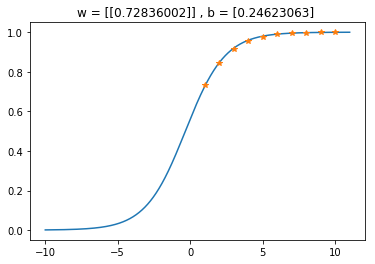

In [0]:
XX = np.linspace(-10,11,10000).reshape(10000,1)
YY = [sf.Sigmoid(x) for x in XX]
plt.plot(XX,YY)
plt.plot(X,Y,'*')
plt.title("w = {} , b = {} ".format(sf.w,sf.b));

In [0]:
sf.fit(X,Y,10000,0.05)

In [0]:
sf.w,sf.b

(array([[0.69974937]]), array([0.30003543]))

In [0]:
#For Binary Classification we will use the Threshold to classify the output as 0 and 1

# MSE = Squared Error loss / Number of Inputs

In [0]:
sf.Loss(X,Y)

Loss is : [1.05143562e-08]


In [0]:
mse = 1.05143562e-08/X.shape[0]
mse

1.05143562e-09

In [0]:
#MSE using SKLEARN
#mean_squared_error (Y_true,Y_pred)

In [0]:
Y_pred = [sf.Sigmoid(x) for x in X]

In [0]:
Y_pred

[array([0.73101626]),
 array([0.84547388]),
 array([0.91677265]),
 array([0.95685284]),
 array([0.97809265]),
 array([0.98899709]),
 array([0.99450431]),
 array([0.99726267]),
 array([0.99863846]),
 array([0.99932325])]

In [0]:
mse_sciki = mean_squared_error(Y,Y_pred)

In [0]:
print("MSE using Scikit is ",mse_sciki)

MSE using Scikit is  1.0514356221054635e-09
